## K-Medias

### 1. Objetivos:
    - Aprender a aplicar un algoritmo de K-Medias
    
---
    
### 2. Desarrollo:

Tenemos un dataset que contiene latitudes y longitudes de algunos crímenes cometidos en una región no especificada:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../../Datasets/crimenes_locacion-1.csv')

df.head()

,codigo_crimen,latitud,longitud
0,3,-14.870725,-9.102986
1,4,6.173945,6.683145
2,5,-18.930867,-9.142319
3,7,-4.926713,10.619584
4,3,-6.976464,-4.814526


Vamos a visualizar los puntos geográficos formados por cada par de latitudes y longitudes:

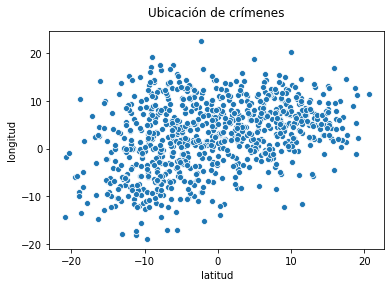

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicación de crímenes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(df['latitud'], df['longitud'], ax=ax);

Digamos que queremos establecer algunos centros de vigilancia en esta región. Queremos que cada centro de vigilancia pueda atender efectivamente a la subregión que le toque vigilar. Para esto, tenemos que subdividir nuestra región en varias subregiones. No sabemos cómo se conforman esas subregiones, ni tampoco sabemos a qué subregión pertenecería cada una de las instancias de actividad delictiva.

Asumiendo que los patrones de actividad delictiva se mantienen más o menos constantes, podemos utilizar K-Medias para subdividir nuestra región en subregiones. Lo único que tenemos que elegir es cuántas subregiones queremos conformar. Esta decisión podría ser tomada con base en los recursos disponibles, por ejemplo. Si tuviéramos recursos para establecer 6 centros de vigilancia, entonces podemos crear 6 subregiones.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k_means = KMeans(n_clusters=6, max_iter=10000)

In [ ]:
k_means.fit(df[['latitud', 'longitud']])

KMeans(max_iter=10000, n_clusters=6)

In [ ]:
centers = k_means.cluster_centers_

centers

array([[-9.93727263, -8.59718879],
       [11.92110359,  6.22939013],
       [-7.6709796 , 11.31788808],
       [-7.94346537,  1.37622681],
       [ 3.0083122 ,  8.96477392],
       [ 2.897734  , -0.97918212]])

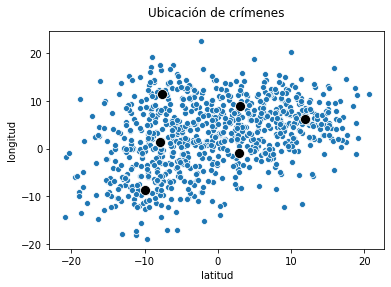

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicación de crímenes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(df['latitud'], df['longitud'], ax=ax, palette='rainbow');
sns.scatterplot(centers[:,0], centers[:,1], ax=ax, s=100, color='black');

Vamos a clasificar nuestros datos para poder colorearlos y visualizar mejor las subregiones:

In [ ]:
clasificaciones = k_means.predict(df[['latitud', 'longitud']])

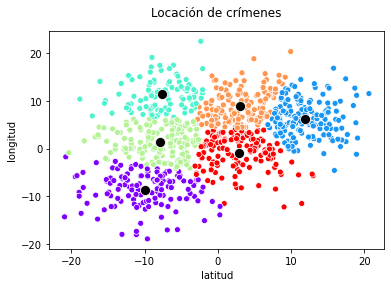

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Locación de crímenes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(df['latitud'], df['longitud'], ax=ax, hue=clasificaciones, palette='rainbow');
sns.scatterplot(centers[:,0], centers[:,1], ax=ax, s=100, color='black');

ax.get_legend().remove()

Subdiviendo nuestra región en estas 6 subregiones, tenemos cierta seguridad de que toda la actividad delictiva que sucede en la región podrá ser atendida efectivamente.

Si tuviéramos recursos para 9 centros de vigilancia, bastaría con realizar lo siguiente:

In [ ]:
k_means_9 = KMeans(n_clusters=9, max_iter=10000)

In [ ]:
k_means_9.fit(df[['latitud', 'longitud']])
centers_9 = k_means_9.cluster_centers_
clasificaciones_9 = k_means_9.predict(df[['latitud', 'longitud']])

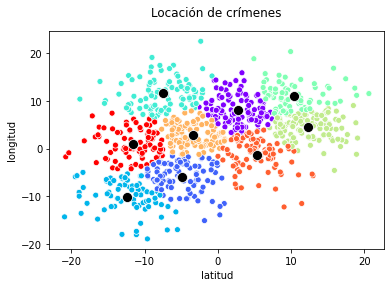

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Locación de crímenes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(df['latitud'], df['longitud'], ax=ax, hue=clasificaciones_9, palette='rainbow');
sns.scatterplot(centers_9[:,0], centers_9[:,1], ax=ax, s=100, color='black');

ax.get_legend().remove()

**¿Qué usos se te ocurren a ti para este algoritmo?**

## Regresión Logística

### 1. Objetivos:
    - Aprender a aplicar un algoritmo de Regresión Logística
    
---
    
### 2. Desarrollo:

Tenemos el siguiente dataset con mediciones tomadas a diversos tumores de mama, junto con el diagnóstico que fue hecho. El diagnóstico puede ser 'M' para maligno y 'B' para benigno:

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('../../Datasets/breast_cancer_wisconsin.csv', index_col=0)

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Primero que nada vamos a limpiar nuestro dataset un poco:

In [ ]:
df = df.drop(columns=['Unnamed: 32'])

In [ ]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


Vamos a intentar entrenar un modelo de Regresión Logística para clasificar tumores como malignos o benignos.

In [ ]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Ya que tenemos un modelo, podemos hacer predicciones utilizando el dataset de prueba:

In [ ]:
y_pred = logreg.predict(X_test)

y_pred

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0])

¿Cómo sabemos si esto es correcto o no? Bueno, LogisticRegression tiene un método `score` para obtener la exactitud del modelo:

In [ ]:
logreg.score(X_test, y_test)

0.9415204678362573

El score de este modelo se llama `mean accuracy` (exactitud promedio). Este valor puede encontrarse en un intervalo entre 0 y 1, con 1 siendo 'exactitud perfecta'. Como puedes ver este modelo es bastante exacto. Pero... ¿qué significa que un modelo de clasificación binaria sea exacto? ¿De dónde proviene este número?

## Matriz de confusión

### 1. Objetivos:
    - Aprender a evaluar un modelo de clasificación binaria utilizando una matriz de confusión.
    
---
    
### 2. Desarrollo:

Entonces quedamos que una matriz de confusión se ve así:

In [ ]:
from IPython.display import Image
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Ésta es una matriz de 2x2, donde el eje x representa los resultados estimados por el modelo y el eje y representa la realidad (la clasificación que ya ha sido realizada en el dataset de prueba).

Como puedes ver, para cada uno de los dos ejes hay dos valores posibles: negativo y positivo. Negativo es la clasificación 0, el 'no'. Positivo es la clasificación 1, el `sí` (en nuestro ejemplo, positivo significa: 'el tumor es maligno').

Dependiendo de cuál es la etiqueta real (la que sabemos que es cierta) y cuál fue la que nuestro modelo estimó, hay 4 posibles categorías:

1. Verdadero Positivo (VP): Cuando la etiqueta real era positiva y nuestro modelo regresó un resultado positivo.
2. Falso Negativo (FN): Cuando la etiqueta real era positiva pero nuestro modelo regresó un resultado negativo.
3. Falso Positivo (FP): Cuando la etiqueta real era negativa pero nuestro modelo regresó un resultado positivo.
4. Verdadero Negativo (VN): Cuando la etiqueta real era negativa y nuestro modelo regresó un resultado negativo.

En estas 4 categorías se engloban todas las posibilidades. Obviamente queremos que la cantidad de Verdaderos Positivos y Verdaderos Negativos sea lo mayor posible. Volvamos a entrenar nuestro modelo para visualizar la matriz de confusión que le corresponde:

In [ ]:
df = pd.read_csv('../../Datasets/breast_cancer_wisconsin.csv', index_col=0)
df = df.drop(columns=['Unnamed: 32'])
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [ ]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred = logreg.predict(X_test)

Listo, vamos a obtener nuestra matriz de confusión y visualizarla:

In [ ]:
from sklearn import metrics

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[105,   6],
       [  6,  54]])

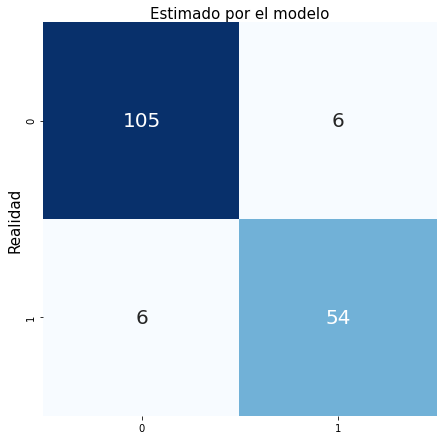

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

Una vez obtenida nuestra matriz de confusión, podemos utilizar 4 medidas de evaluación llamadas: Precisión (Precision), Exactitud (Accuracy), Sensibilidad (Recall / Sensitivity) y Especificidad (Specificity). Cada una mide un aspecto de nuestro modelo:

1. Precisión: De todas las clasificaciones positivas que hicimos, ¿cuántas de ésas eran en realidad positivas?

`precision = VP / (VP + FP)`

2. Exactitud: Del total de clasificaciones que hicimos, ¿cuántas fueron clasificadas correctamente?

`exactitud = (VP + VN) / (VP + FN + FP + VN)`

3. Sensibilidad: De todas las clasificaciones positivas que había en realidad, ¿cuántas fueron clasificadas correctamente como positivas?

`sensibilidad = VP / (VP + FN)`

4. Especificidad: De todas las clasificaciones negativas que había en realidad, ¿cuántas fueron clasificadas correctamente como negativas?

`especificidad = VN / (VN + FP)`

Todas estas medidas pueden tener valores entre 0 y 1. Entre más cerca del 1 estén, mejor es nuestro modelo. En nuestro ejemplo, éstas son las medidas que obtuvimos:

In [ ]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.9
Exactitud: 0.9298245614035088
Sensibilidad: 0.9
Especificidad: 0.9459459459459459


¡Nuestro modelo es bastante bueno!

Aprendamos ahora de qué manera podemos visualizar también el desempeño de un modelo de clasificación.

## Curva ROC / AUC

### 1. Objetivos:
    - Aprender a evaluar un modelo de clasificación binaria utilizando una curva ROC / AUC.
    
---
    
### 2. Desarrollo:

Tenemos entonces que una curva ROC / AUC se ve así:

El eje `y` representa la proporción de Verdaderos Positivos, que es lo mismo que la Sensibilidad.

El eje `x` representa la proporción de Falsos Positivos. Esto quiere decir: de todas las clasificaciones negativas que había en realidad, cuántas fueron clasificadas como positivas por nuestro modelo. Para obtener este valor, restamos el valor de Especificidad a 1 (`1 - especificidad`).

La curva ROC grafica el cambio en la proporción de Verdaderos Positivos contra la proporción de Falsos Positivos a través de diferentes *umbrales*.

La AUC (Area Under The Curve), o área debajo de la curva, es toda el área que se encuentra por debajo de la curva ROC. Podemos tener un valor entre 0 y 1.

Un valor de AUC cercano a 1, como el que podemos ver en el dibujo anterior, significa que nuestro modelo es muy bueno para diferenciar entre positivos y negativos. Además, es muy probable que elija el valor correcto.

Un valor de AUC cercano al 0.5 significa que nuestro modelo no puede diferenciar entre positivos y negativos. Un valor cercano al 0.5 se vería así:

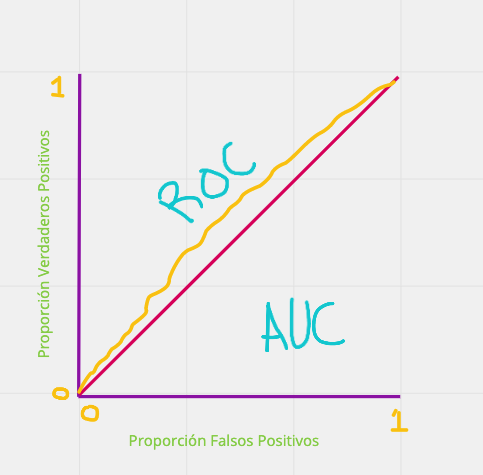

In [ ]:
Image('../Imgs/sesion_8-10.png')

Un valor cercano a 0 significa que nuestro modelo es muy bueno para diferenciar entre positivos y negativos **pero** elige casi siempre el valor contrario al real. O sea, elige positivos cuando debería de elegir negativos, y viceversa. Esta gráfica se vería así:

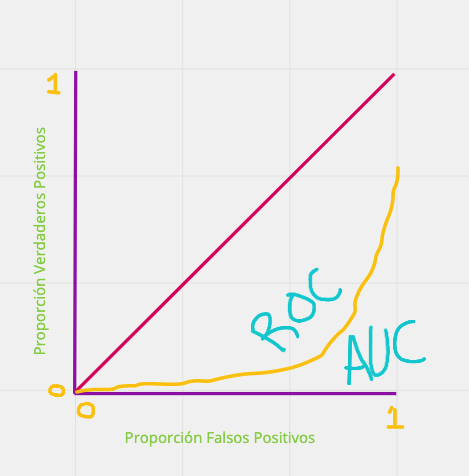

In [ ]:
Image('../Imgs/sesion_8-11.png')

Volvamos a entrenar nuestro modelo para evaluarlo con una curva ROC / AUC:

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('../../Datasets/breast_cancer_wisconsin.csv', index_col=0)
df = df.drop(columns=['Unnamed: 32'])
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [ ]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

La matriz de confusión requiere de resultados binarios, es decir 'correcto' o 'incorrecto', 'positivo' o 'negativo', como estos:

In [ ]:
y_pred = logreg.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

Para graficar una curva ROC / AUC necesitamos resultados probabilísticos, como estos:

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)

y_pred_proba[:10,:]

array([[9.99863395e-01, 1.36605387e-04],
       [9.99998473e-01, 1.52718768e-06],
       [9.97864945e-01, 2.13505477e-03],
       [5.27766373e-01, 4.72233627e-01],
       [9.99983215e-01, 1.67849955e-05],
       [9.79705723e-01, 2.02942774e-02],
       [9.99984983e-01, 1.50173406e-05],
       [9.95124768e-01, 4.87523205e-03],
       [9.99998967e-01, 1.03258788e-06],
       [2.25483787e-09, 9.99999998e-01]])

En esta matriz, cada vector tiene dos valores. El primer valor es la probabilidad de que el valor sea negativo. El segundo valor es la probabilidad de que el valor sea positivo. Necesitamos los resultados de esta manera para poder modificar el umbral y obtener los puntos necesarios para generar la curva ROC.

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

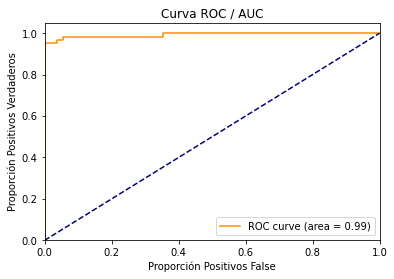

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

Como era de esperarse, nuestro valor AUC es muy cercano al 1 (0.99). Esto significa que nuestro modelo puede diferenciar casi a la perfección entre negativos y positivos, y que además es muy probable que elija la clasificación correcta.

##  Regex

### 1. Objetivos:
    - Repasar algunas reglas básicas de las Expresiones Regulares y su aplicación usando pandas

---
    
### 2. Desarrollo:

Ya conoces seguramente las Expresiones Regulares. Las expresiones regulares o regex son secuencias de caracteres que definen un patrón de búsqueda. Son una manera de describirle a nuestros programas qué patrones estamos buscando en nuestros datos.

Las expresiones regulares resultan sumamente útiles para trabajar con lenguaje natural. Vamos a repasar algunas de las reglas de las regex y a aprender a aplicarlas usando pandas.

Para esto utilizaremos el dataset 'new_york_times_bestsellers-clean.json' que contiene datos acerca de libros que han sido seleccionados como bestsellers del New York Times.

In [ ]:
import pandas as pd
import re

In [ ]:
df = pd.read_json('../../Datasets/new_york_times_bestsellers-clean.json')

df.head()

,amazon_product_url,author,description,publisher,title,oid,bestsellers_date.numberLong,published_date.numberLong,rank.numberInt,rank_last_week.numberInt,weeks_on_list.numberInt,price.numberDouble
0,http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,"Little, Brown",THE HOST,5b4aa4ead3089013507db18c,1211587200000,1212883200000,2,1,3,25.99
1,http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,St. Martin's,LOVE THE ONE YOU'RE WITH,5b4aa4ead3089013507db18d,1211587200000,1212883200000,3,2,2,24.95
2,http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,Putnam,THE FRONT,5b4aa4ead3089013507db18e,1211587200000,1212883200000,4,0,1,22.95
3,http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,Doubleday,SNUFF,5b4aa4ead3089013507db18f,1211587200000,1212883200000,5,0,1,24.95
4,http://www.amazon.com/Sundays-at-Tiffanys-Jame...,James Patterson and Gabrielle Charbonnet,A woman finds an unexpected love,"Little, Brown",SUNDAYS AT TIFFANY’S,5b4aa4ead3089013507db190,1211587200000,1212883200000,6,3,4,24.99


In [ ]:
grouped_by_title = df.groupby('title')['description'].max()

grouped_by_title

title
10TH ANNIVERSARY            Detective Lindsay Boxer and the Women’s Murder...
11TH HOUR                   Detective Lindsay Boxer and the Women’s Murder...
1225 CHRISTMAS TREE LANE    Puppies and an ex-husband loom large in the la...
1356                        In the fourth book of the Grail Quest series, ...
1Q84                        In 1980s Tokyo, a woman who punishes perpetrat...
                                                  ...                        
Z                           A novel based on the lives of Zelda and F. Sco...
ZERO DAY                       A military investigator uncovers a conspiracy.
ZERO HISTORY                Several characters from “Spook Country” return...
ZONE ONE                      Fighting zombies in post-apocalyptic Manhattan.
ZOO                         A young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object

Hay varias entradas para los mismos libros, así que los he agrupado por título. En la columna 'description' tenemos descripciones de los libros en nuestro dataset. Resulta un conjunto de datos interesante, puesto que podemos entender qué tipo de libros son los que se convierten en bestsellers del New York Times.

### Patrones de Regex

Vamos a utilizar este dataset para repasar algunas maneras de definir patrones usando regex.

In [ ]:
# Buscar una palabra en un texto

grouped_by_title[grouped_by_title.str.contains('woman', case=False)]

title
1Q84                      In 1980s Tokyo, a woman who punishes perpetrat...
A CEDAR COVE CHRISTMAS    A pregnant woman shows up in Cedar Cove on Chr...
A CHANGE IN ALTITUDE      A young woman’s life is transformed by a mount...
A TURN IN THE ROAD        A middle-age woman takes a cross-country road ...
AN OBJECT OF BEAUTY       A young, beautiful and ambitious woman ruthles...
                                                ...                        
THIS BODY OF DEATH        Detective Thomas Lynley becomes involved when ...
THOSE IN PERIL            A private security agent battles pirates who h...
WHAT DOESN'T KILL YOU     A Hong Kong woman who works for the C.I.A. sea...
WHERE WE BELONG           A woman’s successful life is disrupted by the ...
WHILE MY SISTER SLEEPS    A woman makes discoveries about her sister and...
Name: description, Length: 74, dtype: object

In [ ]:
# Buscar la aparición de números del 0 al 9

grouped_by_title[grouped_by_title.str.contains('[0-9]')]

title
1Q84                          In 1980s Tokyo, a woman who punishes perpetrat...
2030                          In 2030, the young resent the elderly for drai...
A LESSON IN SECRETS           In the summer of 1932, Maisie Dobbs’s first as...
A MEMORY OF LIGHT             The 14th and final novel in the Wheel of Time ...
A MERCY                       In 17th-­century America, a slave mother urges...
                                                    ...                        
WAKING THE WITCH                 Book 11 of the Women of the Otherworld series.
WHERE WE BELONG               A woman’s successful life is disrupted by the ...
WHERE'D YOU GO, BERNADETTE    A renowned and reclusive Seattle architect dis...
WHITE WITCH, BLACK CURSE      A witch who is also a bounty hunter avenges he...
WORST CASE                    A New York detective raising 10 children alone...
Name: description, Length: 123, dtype: object

In [ ]:
# Uno o más números seguidos por una o más letras

grouped_by_title[grouped_by_title.str.contains('[0-9]+[a-z]+', case=False)]

title
1Q84                                        In 1980s Tokyo, a woman who punishes perpetrat...
A MEMORY OF LIGHT                           The 14th and final novel in the Wheel of Time ...
A MERCY                                     In 17th-­century America, a slave mother urges...
A MIGHTY FORTRESS                           Book 4 of the Safehold series, which translate...
ANGEL TIME                                  \nA contract killer goes back to 13th-century ...
ANOTHER PIECE OF MY HEART                   A woman in her late 30s marries the man of her...
ARCTIC DRIFT                                In his 20th adventure, Dirk Pitt searches for ...
BONES ARE FOREVER                           The forensic anthropologist Temperance Brennan...
BREAKING POINT                              The 13th novel featuring Joe Pickett, a Wyomin...
DAMAGE CONTROL                              An elderly couple’s suicide-by-accident in the...
DARK STORM                                  In the 23r

In [ ]:
# Uno o más números seguidos por las letras 'th'

grouped_by_title[grouped_by_title.str.contains('[0-9]th', case=False)]

title
A MEMORY OF LIGHT                           The 14th and final novel in the Wheel of Time ...
A MERCY                                     In 17th-­century America, a slave mother urges...
A MIGHTY FORTRESS                           Book 4 of the Safehold series, which translate...
ANGEL TIME                                  \nA contract killer goes back to 13th-century ...
ARCTIC DRIFT                                In his 20th adventure, Dirk Pitt searches for ...
BONES ARE FOREVER                           The forensic anthropologist Temperance Brennan...
BREAKING POINT                              The 13th novel featuring Joe Pickett, a Wyomin...
DAMAGE CONTROL                              An elderly couple’s suicide-by-accident in the...
DAYS OF GOLD                                In the 18th century, Edilean and a Scottish la...
FLIRT                                       Anita Blake, vampire hunter, and the males in ...
ISLAND BENEATH THE SEA                      The story 

In [ ]:
# Textos que comiencen con la palabra 'After'

grouped_by_title[grouped_by_title.str.contains('^After', case=False)]

title
DON’T BLINK                        After a gruesome murder in a New York steak ho...
FATAL ERROR                        After the murder of a cyber-sociopath, Ali Rey...
FOUNDERS                           After society collapses, America’s fate is in ...
RAPTURE                            After a man stumbles in front of the reporter ...
STANDING IN ANOTHER MAN'S GRAVE    After retiring from the Edinburgh police force...
THE DOG STARS                      After a flu pandemic kills most of the populat...
THE MAGICIANS                      After sorcery college, a young man lives the h...
WINTER GARDEN                      After their father’s death, two sisters must c...
Name: description, dtype: object

In [ ]:
# Textos que terminen con la palabra 'London' y un punto (.)

grouped_by_title[grouped_by_title.str.contains('London.$', case=False)]

title
A DEVIL IS WAITING        Sean Dillon helps to foil a plot to assassinat...
A WALLFLOWER CHRISTMAS                     Matchmaking in Victorian London.
HER FEARFUL SYMMETRY      A woman haunts the flat she’s left to her twin...
Name: description, dtype: object

In [ ]:
# Textos que contengan la palabra 'cat' o 'dog'

grouped_by_title[grouped_by_title.str.contains('\scat\s|\sdog\s', case=False)]

title
A DOG’S JOURNEY    In a sequel to “A Dog’s Purpose,” Buddy the do...
DARK SUMMER        A veterinarian cares for an injured dog with a...
Name: description, dtype: object

In [ ]:
# Textos que contengan las palabras 'man' y/o 'woman' en singular y plural

grouped_by_title[grouped_by_title.str.contains('wom[ae]n|m[ae]n', case=False)]

title
10TH ANNIVERSARY            Detective Lindsay Boxer and the Women’s Murder...
11TH HOUR                   Detective Lindsay Boxer and the Women’s Murder...
1225 CHRISTMAS TREE LANE    Puppies and an ex-husband loom large in the la...
1Q84                        In 1980s Tokyo, a woman who punishes perpetrat...
A CEDAR COVE CHRISTMAS      A pregnant woman shows up in Cedar Cove on Chr...
                                                  ...                        
WHERE WE BELONG             A woman’s successful life is disrupted by the ...
WHILE MY SISTER SLEEPS      A woman makes discoveries about her sister and...
WICKED APPETITE             A dangerous man needs Elizabeth Tucker’s help ...
ZERO HISTORY                Several characters from “Spook Country” return...
ZONE ONE                      Fighting zombies in post-apocalyptic Manhattan.
Name: description, Length: 197, dtype: object

In [ ]:
# Podemos también reemplazar todos los caracteres que no sean ni alfanuméricos ni espacios o tabs por espacios vacíos
# Esto nos va a ser muy útil más adelante

grouped_by_title.str.replace('[^\w\s]', '')

title
10TH ANNIVERSARY            Detective Lindsay Boxer and the Womens Murder ...
11TH HOUR                   Detective Lindsay Boxer and the Womens Murder ...
1225 CHRISTMAS TREE LANE    Puppies and an exhusband loom large in the las...
1356                        In the fourth book of the Grail Quest series t...
1Q84                        In 1980s Tokyo a woman who punishes perpetrato...
                                                  ...                        
Z                           A novel based on the lives of Zelda and F Scot...
ZERO DAY                        A military investigator uncovers a conspiracy
ZERO HISTORY                Several characters from Spook Country return t...
ZONE ONE                        Fighting zombies in postapocalyptic Manhattan
ZOO                         A young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object

In [ ]:
# Podemos también reemplazar todos los caracteres numéricos por espacios vacíos

grouped_by_title.str.replace('\d','')

title
10TH ANNIVERSARY            Detective Lindsay Boxer and the Women’s Murder...
11TH HOUR                   Detective Lindsay Boxer and the Women’s Murder...
1225 CHRISTMAS TREE LANE    Puppies and an ex-husband loom large in the la...
1356                        In the fourth book of the Grail Quest series, ...
1Q84                        In s Tokyo, a woman who punishes perpetrators ...
                                                  ...                        
Z                           A novel based on the lives of Zelda and F. Sco...
ZERO DAY                       A military investigator uncovers a conspiracy.
ZERO HISTORY                Several characters from “Spook Country” return...
ZONE ONE                      Fighting zombies in post-apocalyptic Manhattan.
ZOO                         A young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object